# Balance Scale Data Set
 Data Set Information:
	This data set was generated to model psychological
	experimental results.  Each example is classified as having the
	balance scale tip to the right, tip to the left, or be
	balanced.  The attributes are the left weight, the left
	distance, the right weight, and the right distance.  The
	correct way to find the class is the greater of 
	(left-distance * left-weight) and (right-distance *
	right-weight).  If they are equal, it is balanced.

 ## Number of Instances: 
 625 (49 balanced, 288 left, 288 right)

 ## Number of Attributes: 
 4 (numeric) + class name = 5


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from data_cleaning import get_data
#import cProfile
% load_ext line_profiler
from numba import jit

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [85]:
def tar2ind(Y):
    N = len(Y)
    D = len(set(Y))
    ind = np.zeros((N,D))
    for i in range(0,N):
        num = Y[i]
        ind[i,num]=1
    return ind

def relu(Z):
    return Z*(Z>0)

def sigmoid(Z):
    Z = np.exp(-Z)
    return 1/(1+Z)

def softmax(Z):
    Z = np.exp(Z)
    return Z/Z.sum(axis =1 ,keepdims=True)

def forward(X,W1,b1,W2,b2):
    #Z = relu(X.dot(W1)+b1)
    Z = np.tanh(X.dot(W1)+b1)
    out = softmax(Z.dot(W2)+b2)
    return out,Z

def cross_entropy(Y,T):
    return -(T*np.log(Y)).sum()

def classification_rate(Y,T):
    return np.mean(Y==T)


In [86]:

def main():
    X,Y = get_data(True) # We will first get the data
    X_train=X[:600,:]
    Y_train =Y[:600]     #and split the data into test and training samples
    X_test = X[600:,:]
    Y_test = Y[600:]

    # We will first convert the target into indicator matrix
    ind = tar2ind(Y_train)
    N,D = X_train.shape # Initializing number of samples & Dimentionality
    M = 30 # our hidden layer size
    _,K = ind.shape # output layer size

    #Initializing our weight matrix
    W1 = np.random.randn(D,M)/np.sqrt(D)
    b1 = np.random.randn(M)
    W2 = np.random.randn(M,K)/np.sqrt(M)
    b2 = np.random.randn(K)
    learning_rate = 10e-5
    cost = []
    print("Training...")

    # Now that all ingredients for the soup is ready , lets start with feed forward
    for i in range(0,10000):
        

        output,Z = forward(X_train,W1,b1,W2,b2)
        #Performing backpropagation now
        W2 = W2 + learning_rate * (Z.T.dot(ind-output))
        b2 = b2 + learning_rate *((ind-output).sum(axis = 0))
        #dz = (ind-output).dot(W2.T)*Z*(1-Z)
        dz = (ind-output).dot(W2.T)*(1-Z*Z) #For tanh
        #dz = (ind-output).dot(W2.T)*(Z>0)#For relu
        W1 = W1 + learning_rate * (X_train.T.dot(dz))
        b1 = b1+ learning_rate*(dz.sum(axis = 0 ))
        c = cross_entropy(output,ind)
        cost.append(c)

        if i%500 ==0:



            Y_pred = np.argmax(output,axis=1)

            r = classification_rate(Y_pred,Y_train)
            print("iteration:",i,"cost",c,"classification_rate:",r)
    plt.plot(cost)
    plt.ylabel("cost")
    plt.xlabel("iterations")
    plt.show()
    Y_test_mat,_ = forward(X_test,W1,b1,W2,b2)
    Y_test_pred = np.argmax(Y_test_mat,axis=1)
    result = classification_rate(Y_test_pred,Y_test)
    print("Classification rate of test data is : ",result)

Training...
iteration: 0 cost 1053.65014994 classification_rate: 0.305
iteration: 500 cost 173.538112669 classification_rate: 0.91
iteration: 1000 cost 123.819066476 classification_rate: 0.94
iteration: 1500 cost 91.4357398851 classification_rate: 0.965
iteration: 2000 cost 71.5387987209 classification_rate: 0.973333333333
iteration: 2500 cost 58.6031096547 classification_rate: 0.978333333333
iteration: 3000 cost 49.7214194081 classification_rate: 0.983333333333
iteration: 3500 cost 43.294679162 classification_rate: 0.986666666667
iteration: 4000 cost 38.4185407199 classification_rate: 0.99
iteration: 4500 cost 34.5787925442 classification_rate: 0.99
iteration: 5000 cost 31.4594900257 classification_rate: 0.991666666667
iteration: 5500 cost 28.851197768 classification_rate: 0.993333333333
iteration: 6000 cost 26.6352896346 classification_rate: 0.995
iteration: 6500 cost 24.7562098858 classification_rate: 0.995
iteration: 7000 cost 23.1304604901 classification_rate: 0.995
iteration: 750

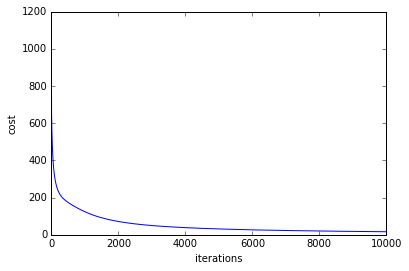

Classification rate of test data is :  0.968325791855

*** Profile printout saved to text file 'timings.txt'. 


In [87]:
%lprun -T timings.txt -f main main()

tar2ind (pyobject,)
--------------------------------------------------------------------------------
# File: <ipython-input-77-de67d2dd7e4e>
# --- LINE 1 --- 
# label 0
#   del $0.1
#   del $0.3
#   del $0.5
#   del $0.7
#   del $0.4
#   del $0.8
#   del $0.9
#   del D
#   del $0.13
#   del $0.10
#   del $0.14

@jit

# --- LINE 2 --- 

def tar2ind(Y):

    # --- LINE 3 --- 
    #   Y = arg(0, name=Y)  :: pyobject
    #   $0.1 = global(len: <built-in function len>)  :: pyobject
    #   $0.3 = call $0.1(Y, vararg=None, func=$0.1, kws=[], args=[Var(Y, <ipython-input-77-de67d2dd7e4e> (3))])  :: pyobject
    #   N = $0.3  :: pyobject

    N = len(Y)

    # --- LINE 4 --- 
    #   $0.4 = global(len: <built-in function len>)  :: pyobject
    #   $0.5 = global(set: <class 'set'>)  :: pyobject
    #   $0.7 = call $0.5(Y, vararg=None, func=$0.5, kws=[], args=[Var(Y, <ipython-input-77-de67d2dd7e4e> (3))])  :: pyobject
    #   $0.8 = call $0.4($0.7, vararg=None, func=$0.4, kws=[], args=[Var($0.7, 

In [29]:
#if __name__ =="__main__":
   # main()
    